In [1]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# Hyper parameters. If you use faster CPUs or GPUs, you can use big numbers
iters_num = 200 # Iteration count
# iters_num = 10000
train_size = x_train.shape[0]
batch_size = 10  # Minibatch size
# batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# Iterations per epoch
iter_per_epoch = max(train_size / batch_size, 1)

In [3]:
for i in range(iters_num):
    # Get a minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # Calculate the gradient
    grad = network.gradient(x_batch, t_batch)
    
    # Update the parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % 5 == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))
    
    # Epoch version: if (iters_num * batch_size) is sufficiently big, use this (for epoch)
#     if i % iter_per_epoch == 0:
#         train_acc = network.accuracy(x_train, t_train)
#         test_acc = network.accuracy(x_test, t_test)
#         train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.0915333333333, 0.09
train acc, test acc | 0.114966666667, 0.1175
train acc, test acc | 0.116666666667, 0.1173
train acc, test acc | 0.209316666667, 0.2159
train acc, test acc | 0.199283333333, 0.2024
train acc, test acc | 0.215283333333, 0.2215
train acc, test acc | 0.214633333333, 0.2173
train acc, test acc | 0.214083333333, 0.2167
train acc, test acc | 0.279683333333, 0.284
train acc, test acc | 0.227116666667, 0.2278
train acc, test acc | 0.29525, 0.2917
train acc, test acc | 0.286566666667, 0.2901
train acc, test acc | 0.3738, 0.378
train acc, test acc | 0.299883333333, 0.3007
train acc, test acc | 0.289583333333, 0.2916
train acc, test acc | 0.384483333333, 0.3833
train acc, test acc | 0.43455, 0.4386
train acc, test acc | 0.48095, 0.4821
train acc, test acc | 0.528033333333, 0.5321
train acc, test acc | 0.546766666667, 0.5476
train acc, test acc | 0.522933333333, 0.5287
train acc, test acc | 0.575, 0.5773
train acc, tes

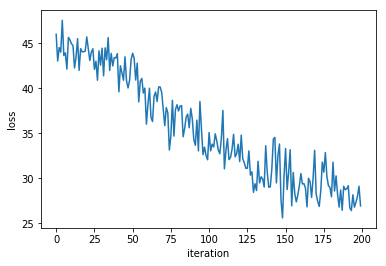

In [4]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='loss')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

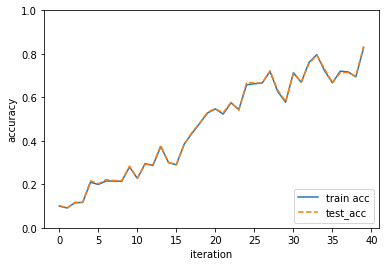

In [5]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test_acc', linestyle='--')

plt.xlabel('iteration')
# Epoch version
# plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()